In [69]:
pip install --upgrade pymupdf

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
%cd /content/drive/MyDrive/PPW

/content/drive/MyDrive/PPW


In [72]:
import pymupdf

doc = pymupdf.open("main.pdf") # open a document
out = open("output.txt", "wb") # create a text output
for page in doc: # iterate the document pages
    text = page.get_text().encode("utf8") # get plain text (is in UTF-8)
    out.write(text) # write text of page
    out.write(bytes((12,))) # write page delimiter (form feed 0x0C)
out.close()

In [73]:
%%capture
!pip install nltk

In [74]:
import nltk
nltk.download('punkt')  # hanya perlu sekali
nltk.download('punkt_tab')  # opsional, untuk versi terbaru NLTK (≥3.8.2)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [75]:
with open('output.txt', 'r', encoding='utf-8') as file:
    teks = file.read()

print(teks[:200])  # tampilkan 200 karakter pertama

JITET (Jurnal Informatika dan Teknik Elektro Terapan) 
 
Vol. 13 No. 2, pISSN: 2303-0577 eISSN: 2830-7062              http://dx.doi.org/10.23960/jitet.v13i2.6250 
 
 
 496 
 
ANALISIS SENTIMEN TERHAD


In [76]:
# Install: pip install nltk
import nltk


sentences = nltk.sent_tokenize(teks)
print(sentences)

['JITET (Jurnal Informatika dan Teknik Elektro Terapan) \n \nVol.', '13 No.', '2, pISSN: 2303-0577 eISSN: 2830-7062              http://dx.doi.org/10.23960/jitet.v13i2.6250 \n \n \n 496 \n \nANALISIS SENTIMEN TERHADAP ULASAN PENGGUNA \nAPLIKASI THREADS INSTAGRAM DI PLAYSTORE \nMENGGUNAKAN ALGORITMA NAIVE BAYES \n \nLa Ode Lukmana1*, Dian Ramadani L2, Putri Elisya3 \n1,2 Universitas Halu Oleo; Kampus Bumi Tridharma Anduonohu, Jalan H.E.A.', 'Mokodompit, Kodya \nKendari, Sulawesi Tenggara 93232; Telp.', '0401-3194163 /Fax.', '0401-3190006 \n \n \nReceived: 18 Februari 2025 \nAccepted: 24 Maret 2025 \nPublished:   14 April 2025 \n \nKeywords:  \nAnalisis Sentimen, Naive \nBayes, Threads Instagram, \nPlaystore.', 'Corespondent Email: \nlaode.lukmana88@gmail.com \n \n \n \nAbstrak.', 'Analisis sentimen atau bisa disebut juga opinion mining merupakan \nproses memahami, mengekstrak dan mengolah data tekstual secara otomatis \nuntuk mendapatkan informasi sentimen yang terkandung dalam suatu ka

In [79]:
import pandas as pd
df = pd.DataFrame(sentences, columns=['kalimat'])
print(df)

                                               kalimat
0    JITET (Jurnal Informatika dan Teknik Elektro T...
1                                               13 No.
2    2, pISSN: 2303-0577 eISSN: 2830-7062          ...
3    Mokodompit, Kodya \nKendari, Sulawesi Tenggara...
4                                   0401-3194163 /Fax.
..                                                 ...
187                                           2, \nPp.
188  233–242, \n2021, \nDoi: \n10.29408/Edumatic.V5...
189  [18] A. Prayoga Permana, K. Ainiyah, And K. Fa...
190                                          [Online].
191  Available: \nHttps://Www.Kaggle.Com/Manishkc06...

[192 rows x 1 columns]


In [80]:
df.to_csv('kalimat.csv', index=False, encoding='utf-8')

Untuk membuat word graph

Lanjutkan dengan menggunakan https://www.geeksforgeeks.org/nlp/co-occurence-matrix-in-nlp/

In [81]:
import pandas as pd

# 1. Read the 'kalimat.csv' file into a pandas DataFrame.
df_kalimat = pd.read_csv('kalimat.csv')

# 2. Access the 'kalimat' column and 3. Concatenate all text entries into a single string.
all_text = df_kalimat['kalimat'].str.cat(sep=' ')

print(f"First 500 characters of the concatenated text:\n{all_text[:500]}")

First 500 characters of the concatenated text:
JITET (Jurnal Informatika dan Teknik Elektro Terapan) 
 
Vol. 13 No. 2, pISSN: 2303-0577 eISSN: 2830-7062              http://dx.doi.org/10.23960/jitet.v13i2.6250 
 
 
 496 
 
ANALISIS SENTIMEN TERHADAP ULASAN PENGGUNA 
APLIKASI THREADS INSTAGRAM DI PLAYSTORE 
MENGGUNAKAN ALGORITMA NAIVE BAYES 
 
La Ode Lukmana1*, Dian Ramadani L2, Putri Elisya3 
1,2 Universitas Halu Oleo; Kampus Bumi Tridharma Anduonohu, Jalan H.E.A. Mokodompit, Kodya 
Kendari, Sulawesi Tenggara 93232; Telp. 0401-3194163 /Fax. 


In [82]:
import re
import string
import pandas as pd

df_to_clean = pd.read_csv('kalimat.csv')

def clean_text(text):
    # Pastikan input string
    if not isinstance(text, str):
        return ""

    # Hapus karakter spesifik
    text = text.replace('◼', '')

    # Deteksi kata berulang seperti "laki-laki", "pura-pura"
    # Pola: kata-kata yang sama dipisah tanda hubung
    text = re.sub(r'\b(\w+)-\1\b', r'\1', text)

    # Hapus punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Hapus angka
    text = re.sub(r'\d+', '', text)

    # Lowercase
    text = text.lower()

    # Hapus kata yang hanya satu huruf (mis. "v", "a", "b")
    text = re.sub(r'\b[a-zA-Z]\b', ' ', text)

    # Hilangkan spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()

    # --- Tambahan: hapus kata berulang berurutan + filter 1 huruf lagi (jaga-jaga) ---
    if text:
        tokens = text.split()

        cleaned_tokens = []
        prev = None
        for tok in tokens:
            # skip kalau hanya satu huruf
            if len(tok) == 1:
                continue
            # skip kalau sama dengan kata sebelumnya (kata berulang)
            if tok == prev:
                continue
            cleaned_tokens.append(tok)
            prev = tok

        text = " ".join(cleaned_tokens)
    # ----------------------------------------------------------------------

    return text

# Terapkan pembersihan
df_to_clean['cleaned_kalimat'] = df_to_clean['kalimat'].apply(clean_text)

# Simpan ke CSV
df_to_clean.to_csv('kalimat_cleaned.csv', index=False, encoding='utf-8')

print("Processed data with cleaned text saved to 'kalimat_cleaned.csv'")
print(df_to_clean[['kalimat', 'cleaned_kalimat']].head())

Processed data with cleaned text saved to 'kalimat_cleaned.csv'
                                             kalimat  \
0  JITET (Jurnal Informatika dan Teknik Elektro T...   
1                                             13 No.   
2  2, pISSN: 2303-0577 eISSN: 2830-7062          ...   
3  Mokodompit, Kodya \nKendari, Sulawesi Tenggara...   
4                                 0401-3194163 /Fax.   

                                     cleaned_kalimat  
0  jitet jurnal informatika dan teknik elektro te...  
1                                                 no  
2  pissn eissn httpdxdoiorgjitetvi analisis senti...  
3    mokodompit kodya kendari sulawesi tenggara telp  
4                                                fax  


##Bigram dan unigram

In [83]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

nltk.download('punkt')
nltk.download('stopwords')

# 1. Filter: Hanya huruf (isalpha), lowercase, & hapus stopword Indonesia
stop_words = set(stopwords.words('indonesian'))
pure_words = [w for w in word_tokenize(teks.lower()) if w.isalpha() and w not in stop_words]

# 2. Buat Unigram & Bigram
unigrams = pure_words
bigrams = [" ".join(bg) for bg in ngrams(pure_words, 2)]

# 3. Gabungkan
all_tokens = unigrams + bigrams

print(f"Hasil Preprocessing: {len(all_tokens)} total token.")
print("Contoh token (campuran unigram & bigram):", all_tokens[10:20])

Hasil Preprocessing: 3991 total token.
Contoh token (campuran unigram & bigram): ['http', 'analisis', 'sentimen', 'ulasan', 'pengguna', 'aplikasi', 'threads', 'instagram', 'playstore', 'algoritma']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##Matriks Ko-okurensi, Centrality, dan 20 Kata penting

In [85]:
import pandas as pd
import numpy as np
import networkx as nx
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import defaultdict, Counter

# Pastikan resource NLTK sudah terunduh
nltk.download('punkt')
nltk.download('stopwords')

# =========================================================
# STEP 1: PREPROCESSING (BAHASA INDONESIA)
# =========================================================
# Kita gunakan variabel 'all_text' yang sudah Anda buat di cell sebelumnya
stop_words = set(stopwords.words('indonesian'))

# Syarat dosen: Hanya huruf (isalpha), tanpa kata tidak jelas (len > 3)
pure_words = [w for w in word_tokenize(all_text.lower())
              if w.isalpha() and w not in stop_words and len(w) > 3]

# Membuat gabungan Unigram (1 kata) dan Bigram (2 kata)
all_tokens = []
for i in range(len(pure_words)):
    all_tokens.append(pure_words[i]) # Unigram
    if i < len(pure_words) - 1:
        all_tokens.append(pure_words[i] + " " + pure_words[i+1]) # Bigram

# --- 1. PRINT HASIL PREPROCESSING ---
print("--- HASIL PREPROCESSING (TOKEN GABUNGAN UNIGRAM & BIGRAM) ---")
print(f"Total semua token: {len(all_tokens)}")
print("20 Token pertama:", all_tokens[:20])
print("-" * 50)

# =========================================================
# STEP 2: MENGHITUNG CO-OCCURRENCE (WINDOW SIZE 3)
# =========================================================
window_size = 3
co_occurrences = defaultdict(Counter)

for i, token in enumerate(all_tokens):
    for j in range(max(0, i - window_size), min(len(all_tokens), i + window_size + 1)):
        if i != j:
            co_occurrences[token][all_tokens[j]] += 1

# =========================================================
# STEP 3: MEMBUAT MATRIKS KO-OKURENSI
# =========================================================
unique_tokens = sorted(list(set(all_tokens)))
token_index = {token: idx for idx, token in enumerate(unique_tokens)}
matrix_size = len(unique_tokens)

# Inisialisasi matriks dengan nol
co_matrix = np.zeros((matrix_size, matrix_size), dtype=int)

# Isi matriks berdasarkan hubungan antar token
for token, neighbors in co_occurrences.items():
    for neighbor, count in neighbors.items():
        co_matrix[token_index[token]][token_index[neighbor]] = count

# Simpan ke DataFrame agar rapi
co_matrix_df = pd.DataFrame(co_matrix, index=unique_tokens, columns=unique_tokens)

# =========================================================
# STEP 4: MEMBUAT GRAF DAN MENGHITUNG 4 CENTRALITY
# =========================================================
G = nx.from_pandas_adjacency(co_matrix_df)

print("Sedang menghitung Centrality (mohon tunggu)...")
pagerank = nx.pagerank(G)
degree = nx.degree_centrality(G)
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)

# Simpan hasil perhitungan ke dalam DataFrame
results = pd.DataFrame({
    'Node': list(pagerank.keys()),
    'PageRank': list(pagerank.values()),
    'Degree': list(degree.values()),
    'Betweenness': list(betweenness.values()),
    'Closeness': list(closeness.values())
})

# Urutkan berdasarkan PageRank tertinggi
top_20 = results.sort_values(by='PageRank', ascending=False).head(20)

# =========================================================
# STEP 5: OUTPUT SESUAI PERMINTAAN
# =========================================================

# Menampilkan Matriks terlebih dahulu
print("\n--- MATRIKS KO-OKURENSI (10x10 Sampel) ---")
print(co_matrix_df.iloc[:10, :10])

# Menampilkan Top 20 kata penting
print("\n--- TOP 20 KATA PENTING (Berdasarkan PageRank) ---")
print(top_20[['Node', 'PageRank', 'Degree', 'Betweenness', 'Closeness']].to_string(index=False))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


--- HASIL PREPROCESSING (TOKEN GABUNGAN UNIGRAM & BIGRAM) ---
Total semua token: 3599
20 Token pertama: ['jitet', 'jitet jurnal', 'jurnal', 'jurnal informatika', 'informatika', 'informatika teknik', 'teknik', 'teknik elektro', 'elektro', 'elektro terapan', 'terapan', 'terapan pissn', 'pissn', 'pissn eissn', 'eissn', 'eissn http', 'http', 'http analisis', 'analisis', 'analisis sentimen']
--------------------------------------------------
Sedang menghitung Centrality (mohon tunggu)...

--- MATRIKS KO-OKURENSI (10x10 Sampel) ---
                    abdul  abdul somad  about  about issue  abstract  \
abdul                   0            1      0            0         0   
abdul somad             1            0      0            0         0   
about                   0            0      0            1         0   
about issue             0            0      1            0         0   
abstract                0            0      0            0         0   
abstract sentiment      0           

##Visualisasi Graph

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 119914 (\N{MATHEMATICAL BOLD ITALIC CAPITAL C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 119952 (\N{MATHEMATICAL BOLD ITALIC SMALL O}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 119958 (\N{MATHEMATICAL BOLD ITALIC SMALL U}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 119951 (\N{MATHEMATICAL BOLD ITALIC SMALL N}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 119957 (\N{MATHEMATICAL BOLD ITALIC SMALL T}) missing f

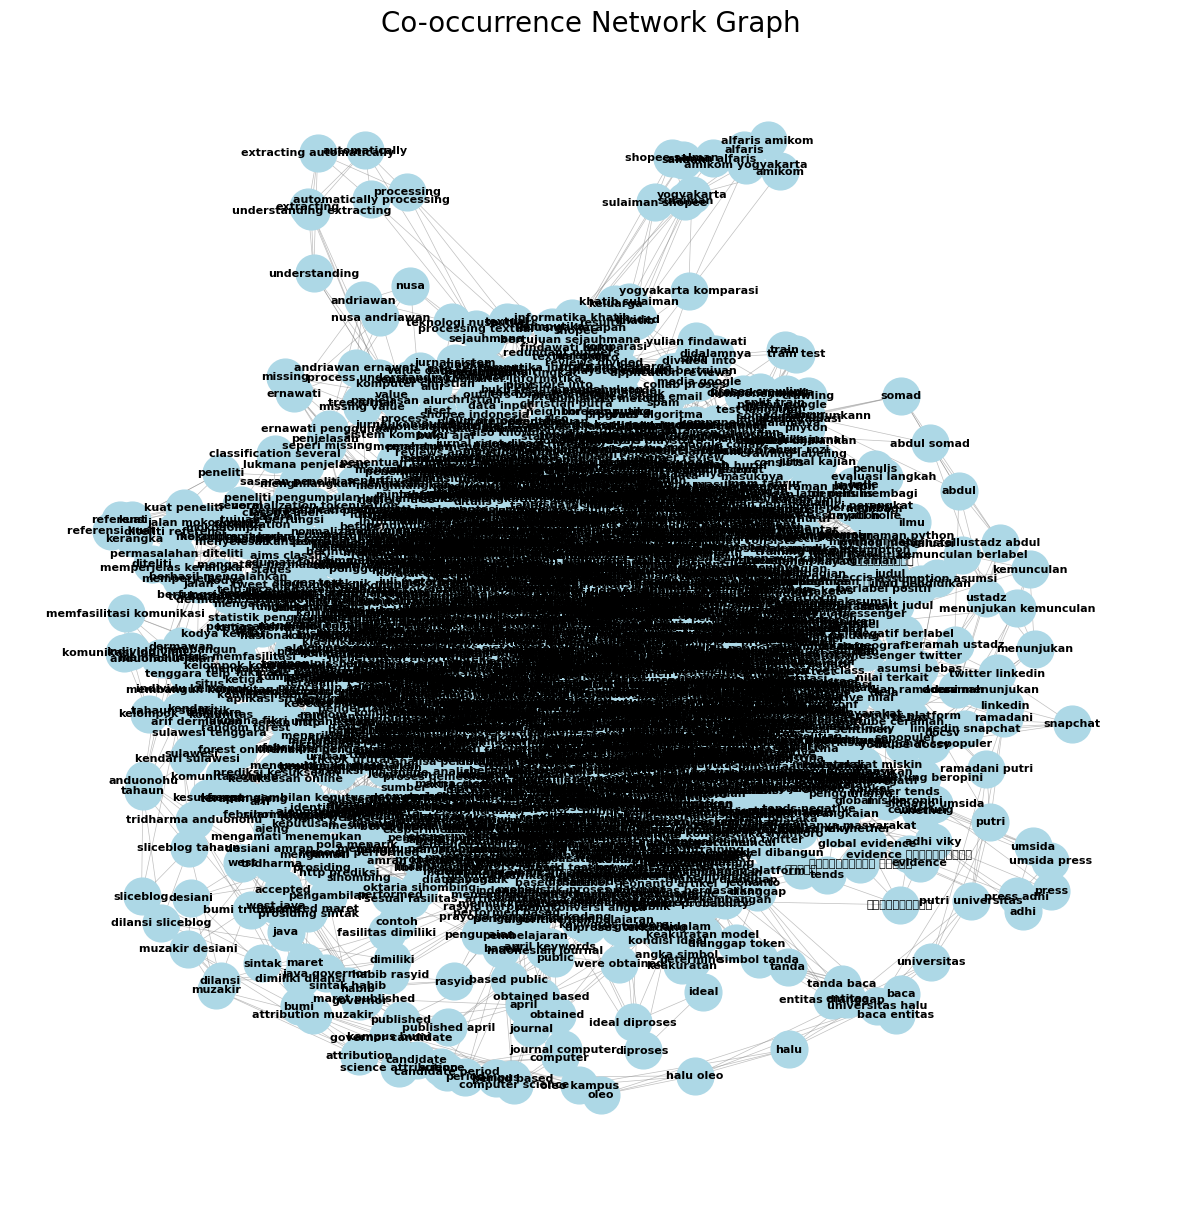

In [86]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.from_pandas_adjacency(co_matrix_df)

# Visualize the graph
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.15, iterations=20) # positions for all nodes - k regulates the distance between nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

plt.title("Co-occurrence Network Graph", size=20)
plt.axis('off') # Hide axes
plt.show()


##Graph 20 kata Terpenting

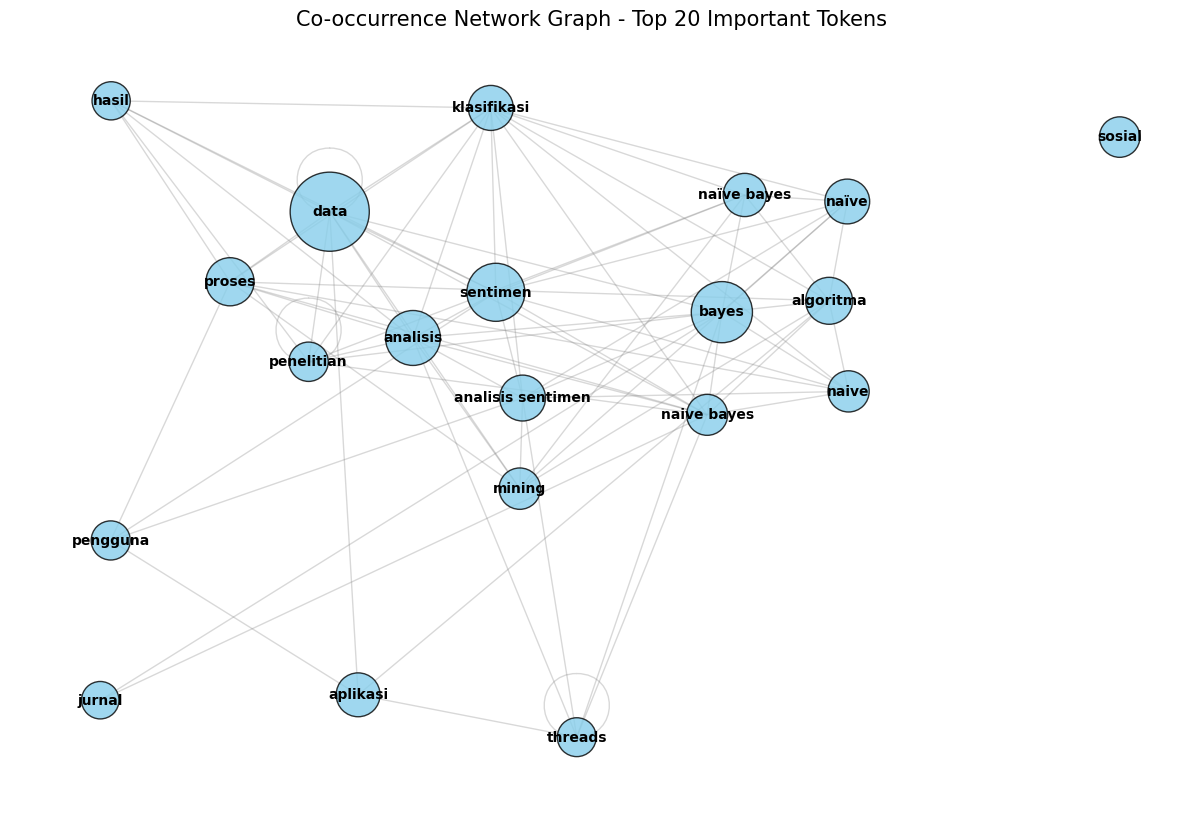

In [87]:
import networkx as nx
import matplotlib.pyplot as plt

# 1. Membuat objek graf dari Matriks Ko-okurensi
G = nx.from_pandas_adjacency(co_matrix_df)

# Ambil Top 20 node (Unigram & Bigram) berdasarkan PageRank
# Ini agar graf tidak terlalu penuh dan terlihat profesional
n_top = 20
top_nodes = results.sort_values(by='PageRank', ascending=False).head(n_top)['Node'].tolist()
sub_G = G.subgraph(top_nodes)

# 3. Pengaturan Visualisasi
plt.figure(figsize=(15, 10))

# Layout: Spring layout membuat node menyebar secara alami (seperti pegas)
pos = nx.spring_layout(sub_G, k=1.5, seed=42)

# Ukuran Node: Disesuaikan dengan nilai PageRank (semakin penting, semakin besar)
node_sizes = [results[results['Node'] == n]['PageRank'].values[0] * 200000 for n in sub_G.nodes()]

# Gambar Node & Garis
nx.draw_networkx_nodes(sub_G, pos, node_size=node_sizes, node_color="skyblue", edgecolors="black", alpha=0.8)
nx.draw_networkx_edges(sub_G, pos, width=1.0, alpha=0.3, edge_color="grey")

# Gambar Label (Nama Kata/Bigram)
nx.draw_networkx_labels(sub_G, pos, font_size=10, font_weight="bold")

plt.title(f"Co-occurrence Network Graph - Top {n_top} Important Tokens", fontsize=15)
plt.axis('off') # Menghilangkan sumbu koordinat
plt.show()

In [88]:
pagerank_scores = nx.pagerank(G)
print("Hasil perhitungan PageRank untuk tiap node:")
for node, score in sorted(pagerank_scores.items(), key=lambda item: item[1], reverse=True)[:10]:
    print(f"{node}: {score:.4f}")

Hasil perhitungan PageRank untuk tiap node:
data: 0.0162
bayes: 0.0097
sentimen: 0.0087
analisis: 0.0078
proses: 0.0060
algoritma: 0.0057
analisis sentimen: 0.0055
klasifikasi: 0.0052
naïve: 0.0052
aplikasi: 0.0050


In [89]:
 import pandas as pd

# 1. Membuat DataFrame pandas dari dictionary pagerank_scores
pagerank_df = pd.DataFrame(list(pagerank_scores.items()), columns=['Kata', 'Skor PageRank'])

# 2. Mengurutkan DataFrame berdasarkan 'Skor PageRank' secara menurun
pagerank_df = pagerank_df.sort_values(by='Skor PageRank', ascending=False)

# 3. Menampilkan 20 kata teratas dari DataFrame yang sudah diurutkan
print("20 kata dengan Skor PageRank tertinggi:")
print(pagerank_df.head(20).reset_index(drop=True))


20 kata dengan Skor PageRank tertinggi:
                 Kata  Skor PageRank
0                data       0.016226
1               bayes       0.009693
2            sentimen       0.008735
3            analisis       0.007825
4              proses       0.006008
5           algoritma       0.005717
6   analisis sentimen       0.005464
7         klasifikasi       0.005248
8               naïve       0.005205
9            aplikasi       0.004992
10        naïve bayes       0.004848
11             mining       0.004441
12              naive       0.004407
13        naive bayes       0.004354
14             sosial       0.004254
15         penelitian       0.004012
16           pengguna       0.003970
17            threads       0.003921
18              hasil       0.003784
19             jurnal       0.003637
